# Explore here

In [52]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from dotenv import load_dotenv
import spotipy
import seaborn as sns
from spotipy.oauth2 import SpotifyClientCredentials
import matplotlib.pyplot as plt

# load the .env file variables
load_dotenv()

True

In [53]:
# Spotify API credentials
client_id = os.environ.get("CLIENT_ID")
client_secret = os.environ.get("CLIENT_SECRET")

In [54]:
#4
auth_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
spotify = spotipy.Spotify(auth_manager=auth_manager)

In [55]:
#5 ID del artista 
metallica_id = "2ye2Wgw4gimLv2eAKyk1NB"

# Los temas más populares del artista
results = spotify.artist_top_tracks(metallica_id)

# Extraer nombre, popularidad y duración (convertida a minutos)
tracks_info = [
    {
        "nombre": track["name"],
        "popularidad": track["popularity"],
        "duración_minutos": round(track["duration_ms"] / 60000, 2), #para convertir los milisegundos en minutos y limitar a dos decimales.
    }
    for track in results["tracks"]
]

# Mostrar top 10 resultados
for track in tracks_info:
    print(track)

{'nombre': 'Enter Sandman - Remastered 2021', 'popularidad': 84, 'duración_minutos': 5.53}
{'nombre': 'Nothing Else Matters - Remastered 2021', 'popularidad': 83, 'duración_minutos': 6.48}
{'nombre': 'Master Of Puppets', 'popularidad': 80, 'duración_minutos': 8.59}
{'nombre': 'One', 'popularidad': 76, 'duración_minutos': 7.44}
{'nombre': 'For Whom The Bell Tolls - Remastered', 'popularidad': 74, 'duración_minutos': 5.17}
{'nombre': 'The Unforgiven - Remastered 2021', 'popularidad': 76, 'duración_minutos': 6.45}
{'nombre': 'Sad But True - Remastered 2021', 'popularidad': 74, 'duración_minutos': 5.41}
{'nombre': 'Whiskey In The Jar', 'popularidad': 76, 'duración_minutos': 5.08}
{'nombre': 'Fuel', 'popularidad': 74, 'duración_minutos': 4.5}
{'nombre': 'Seek & Destroy - Remastered', 'popularidad': 73, 'duración_minutos': 6.91}


In [56]:
#6 Convertir la lista de diccionarios a un DataFrame de Pandas
df_tracks = pd.DataFrame(tracks_info)

# Ordenar las canciones por popularidad de menor a mayor
df_tracks_sorted = df_tracks.sort_values(by="popularidad", ascending=True)

# Mostrar el top 3 con menor popularidad
print(df_tracks_sorted.head(3))

                           nombre  popularidad  duración_minutos
9     Seek & Destroy - Remastered           73              6.91
6  Sad But True - Remastered 2021           74              5.41
8                            Fuel           74              4.50


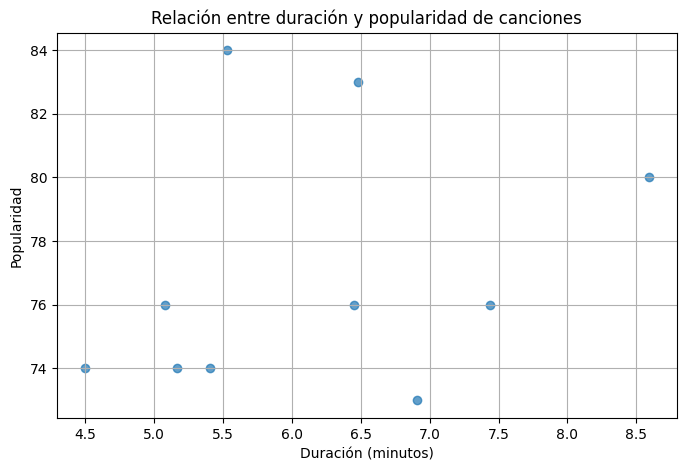

In [57]:
#7 Plot
plt.figure(figsize=(8, 5))
plt.scatter(df_tracks_sorted["duración_minutos"], df_tracks_sorted["popularidad"], alpha=0.7)
plt.xlabel("Duración (minutos)")
plt.ylabel("Popularidad")
plt.title("Relación entre duración y popularidad de canciones")
plt.grid(True)
plt.show()